In [1]:
import sys

import tensorflow as tf
from tensorflow import keras as kr

from time import sleep
import numpy as np
import random
import pandas as pd
pd.set_option('display.max_rows', 200)

import sklearn

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler

import matplotlib 

import matplotlib.pyplot as plt

import zipfile
import os

import supportFunctions as sf

import inspect
lines = inspect.getsource(sf.highest)

In [2]:
#função utilizada para normalizar os dados de treino e validação
def normalize_data(train, test):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(train)
    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)
    
    return scaler, train_scaled, test_scaled

#função utilizada para desnormalizar os dados, no formato de entrada
def denormalize_data(scaler,data):
    result = scaler.inverse_transform(data)
    return result

#função utilizada para desnomalizar o valor predito
def denormalize_prediction(scaler, dataX, dataY):
    formatted_data = np.array(dataX)
    formatted_data[:,3] = np.array(dataY)
    
    return denormalize_data(scaler,formatted_data)[:,3]

In [3]:
#versões das bibliotecas utilizadas
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sklearn.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.9.16 (main, Jan 11 2023, 16:16:36) [MSC v.1916 64 bit (AMD64)]
Pandas 1.5.2
Scikit-Learn 1.2.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT AVAILABLE


In [4]:
#quantos passos para trás os indicadores técnicos vão olhar
ti_memory = 10

#lendo os dados que serão utilizados para treinamento e validação
ge1day = pd.read_csv('Data\GE.csv')
#removendo a coluna que indica a data
ge1day = ge1day.drop(['Date'], axis = 1)

df = ge1day
#reseting the index
df.index = range(len(df))

In [5]:
#adicionando os parametros de indicadores tecnicos ao dataframe
df["""highest_{}""".format(ti_memory)] = sf.highest(df.Close,ti_memory)
df["""lowest_{}""".format(ti_memory)] = sf.lowest(df.Close,ti_memory)
df["""wma_{}""".format(ti_memory)] = sf.wma(df.Close,ti_memory)
df["""ema_{}""".format(ti_memory)] = sf.ema(df.Close,ti_memory)
df["""hma_{}""".format(ti_memory)] = sf.hma(df.Close,ti_memory)
df["""macd_12_26"""] = sf.macd(df.Close,12,26)
df["""rsi_{}""".format(ti_memory)] = sf.rsi(df.Close,ti_memory)
df["""dpo_{}""".format(ti_memory)] = sf.dpo(df.Close,ti_memory)

#parametros nao utilizados:
# df["""sma_{}""".format(ti_memory)] = sf.sma(df.Close,ti_memory)
# df["""so_k_5"""] = sf.so_k(df.Close)
# df["""so_d_3"""] = sf.so_d(df.Close)
# df["""obv""".format(ti_memory)] = sf.obv(df.Close,df.Volume)

C:\Users\guilh\PythonCodes\supportFunctions.py:263: RuntimeWarning: divide by zero encountered in divide
  rs = ag_vector/al_vector #numpy arrays so therefore can use element wise division
C:\Users\guilh\PythonCodes\supportFunctions.py:263: RuntimeWarning: invalid value encountered in divide
  rs = ag_vector/al_vector #numpy arrays so therefore can use element wise division


In [6]:
display(df)

,Open,High,Low,Close,Adj Close,Volume,highest_10,lowest_10,wma_10,ema_10,hma_10,macd_12_26,rsi_10,dpo_10
0,0.751202,0.763722,0.743690,0.748698,0.001782,2156500,0.748698,0.748698,0.748698,0.748698,0.748698,0.000000,NaN,0.000000
1,0.744942,0.744942,0.738682,0.741186,0.001764,1477600,0.748698,0.741186,0.743690,0.744942,0.745359,0.000000,100.000000,-0.744942
2,0.741186,0.747446,0.726162,0.732422,0.001743,1837000,0.748698,0.732422,0.738056,0.740769,0.741708,0.000000,100.000000,-0.740769
3,0.732422,0.733674,0.701122,0.713642,0.001698,2725600,0.748698,0.713642,0.728290,0.733987,0.734112,0.000000,100.000000,-0.733987
4,0.713642,0.713642,0.691106,0.712390,0.001695,3095000,0.748698,0.712390,0.722990,0.729667,0.727268,0.000000,100.000000,-0.729667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14658,7.630000,8.300000,7.510000,8.120000,8.120000,123180900,8.120000,6.110000,7.062182,7.424700,7.239323,-1.116727,50.108961,-0.399000
14659,7.680000,7.870000,7.540000,7.620000,7.620000,93299000,8.120000,6.110000,7.175091,7.460209,7.697586,-1.029444,40.027642,-0.496000
14660,7.540000,7.940000,7.350000,7.890000,7.890000,86850200,8.120000,6.110000,7.341273,7.538353,8.019525,-0.927790,41.907705,-0.579000
14661,7.870000,8.180000,7.820000,7.940000,7.940000,121149900,8.120000,6.110000,7.494182,7.611380,8.165303,-0.833585,32.316173,-1.075000


In [7]:
#jogando alguns dados fora para termos todas variaveis incializadas
inicialization_steps = 30

#quantos passos no futuro estamos prevendo, alterar para 10 para avaliar os resultados dos modelos de previsao +10
prediction_ahead = 1

dataValues = df.values

#separando os dados em treino e validacao
trainSize = int(len(dataValues)*0.8)
testSize = len(dataValues) - trainSize

train = df.head(trainSize)
test = df.tail(testSize)

#normalizando os dados de treinamento e teste
scaler, train_normalized, test_normalized = normalize_data(train, test)

#deixando um valor de fora, para podermos prever o próximo valor quando for o último:
trainX = train_normalized[inicialization_steps:(len(train)-prediction_ahead)]
testX = test_normalized[0:(len(test)-prediction_ahead)]

#pegando apenas o valor que queremos prever
trainY = train_normalized[(inicialization_steps+prediction_ahead):len(train),3]
testY = test_normalized[prediction_ahead:len(test),3]

#inicializando dicionarios, utilizados para armazenar os modelos e as metricas de treino
trained_models_lstm = dict()
rmse_lstm = dict()
mape_lstm = dict()
melhor_modelo_lstm = dict()
predito_lstm = dict()
esperado_lstm = dict()

trained_models_rnn = dict()
rmse_rnn = dict()
mape_rnn = dict()
melhor_modelo_rnn = dict()
predito_rnn = dict()
esperado_rnn = dict()

Modelo 20 nao encontrado!
Shape das entradas e saidas, para validacao:
(11649, 50, 14)
(11649,)
(2882, 50, 14)
(2882,)
91/91 [==============================] - 1s 2ms/step
melhor modelo lstm_50:
0
RMSE:
0.43722004010197635
MAPE:
0.0221507130371703
91/91 [==============================] - 0s 2ms/step


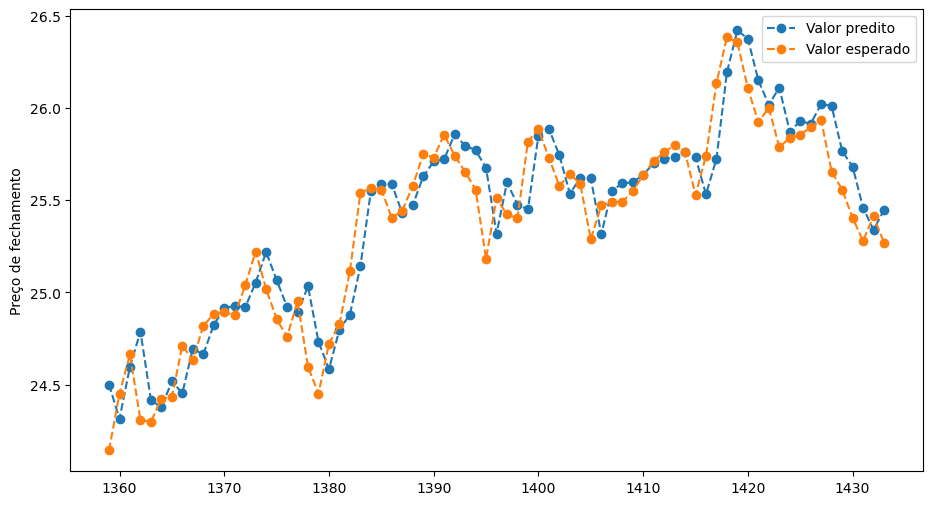

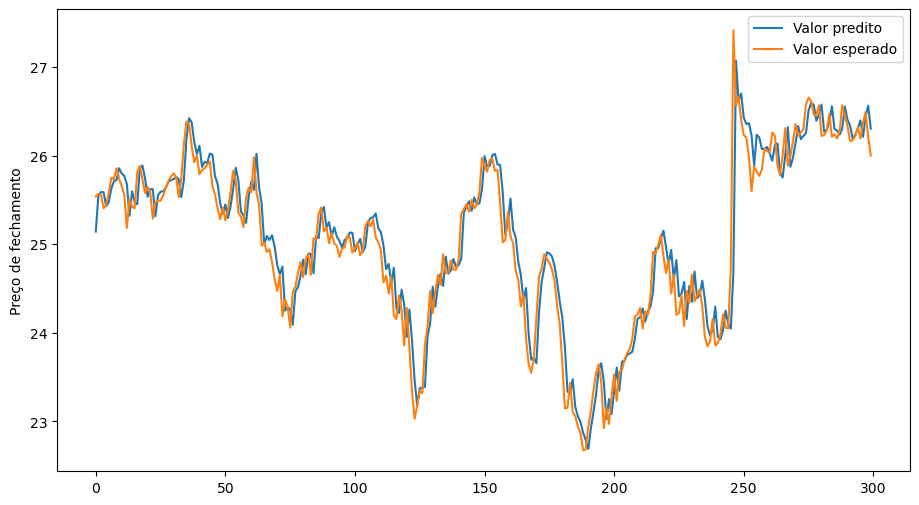

Modelo 20 nao encontrado!
Shape das entradas e saidas, para validacao:
(11599, 100, 14)
(11599,)
(2832, 100, 14)
(2832,)
89/89 [==============================] - 1s 6ms/step
melhor modelo lstm_100:
0
RMSE:
0.3890975789385635
MAPE:
0.0206225516426369
89/89 [==============================] - 1s 6ms/step


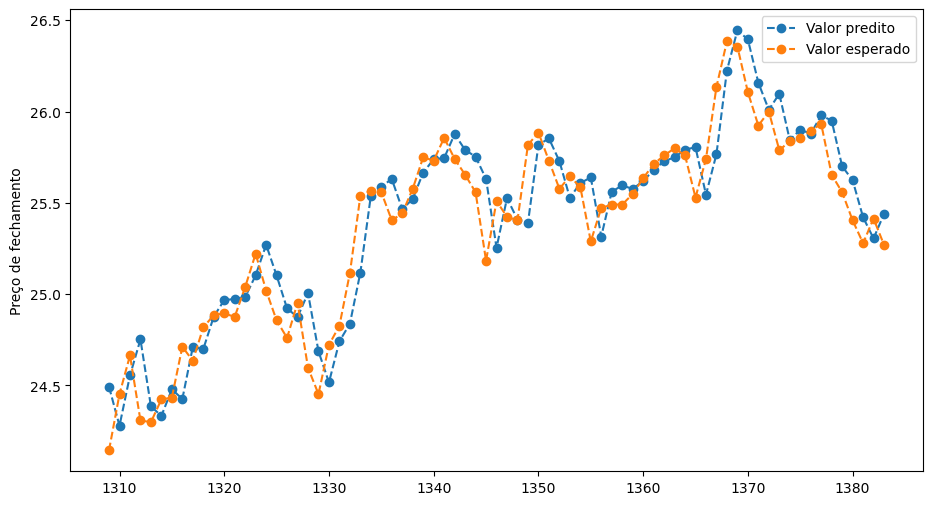

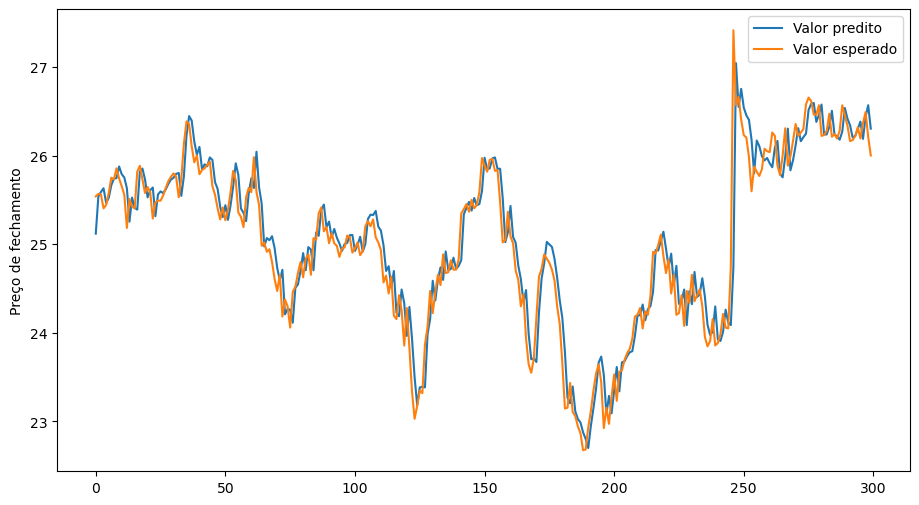

Modelo 20 nao encontrado!
Shape das entradas e saidas, para validacao:
(11499, 200, 14)
(11499,)
(2732, 200, 14)
(2732,)
86/86 [==============================] - 1s 10ms/step
melhor modelo lstm_200:
0
RMSE:
0.3072671070794551
MAPE:
0.014566418285689678
86/86 [==============================] - 1s 10ms/step


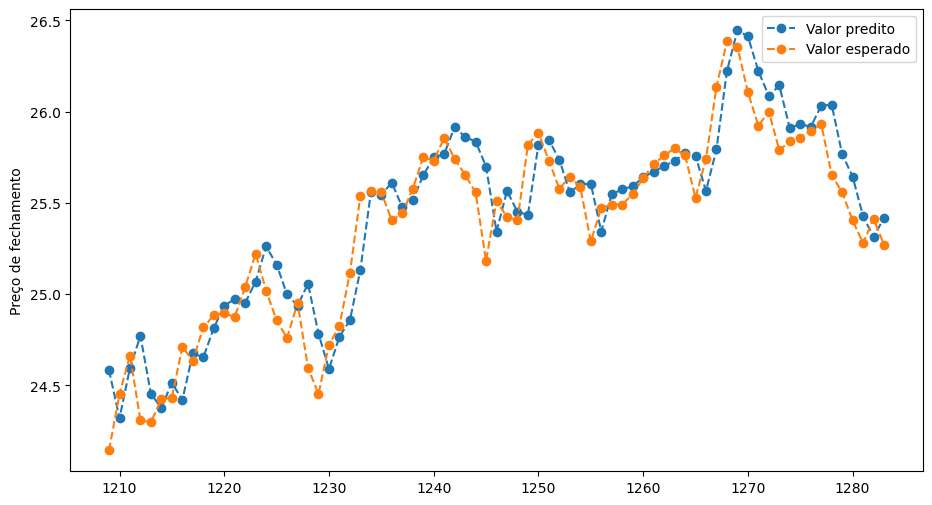

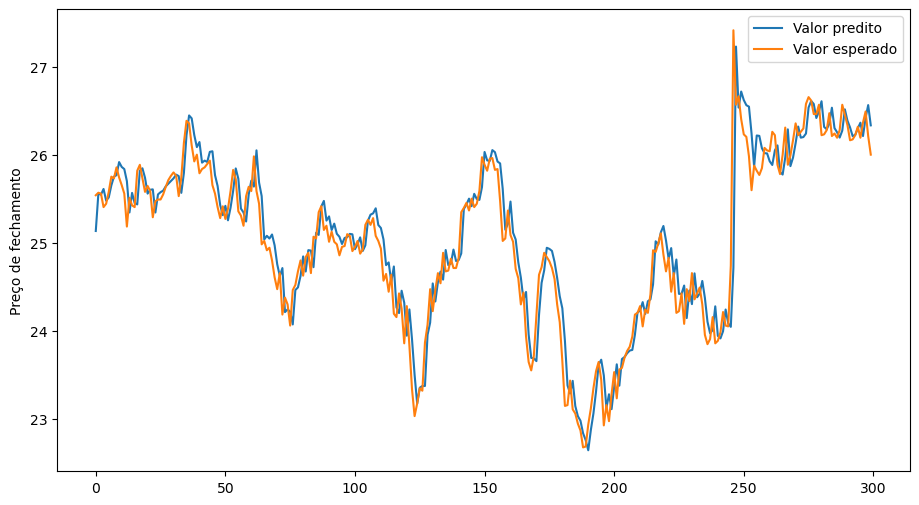

Modelo 10 nao encontrado!
Shape das entradas e saidas, para validacao:
(11299, 400, 14)
(11299,)
(2532, 400, 14)
(2532,)
80/80 [==============================] - 5s 20ms/step
melhor modelo lstm_400:
0
RMSE:
0.28828603048493245
MAPE:
0.012354527213849123
80/80 [==============================] - 2s 20ms/step


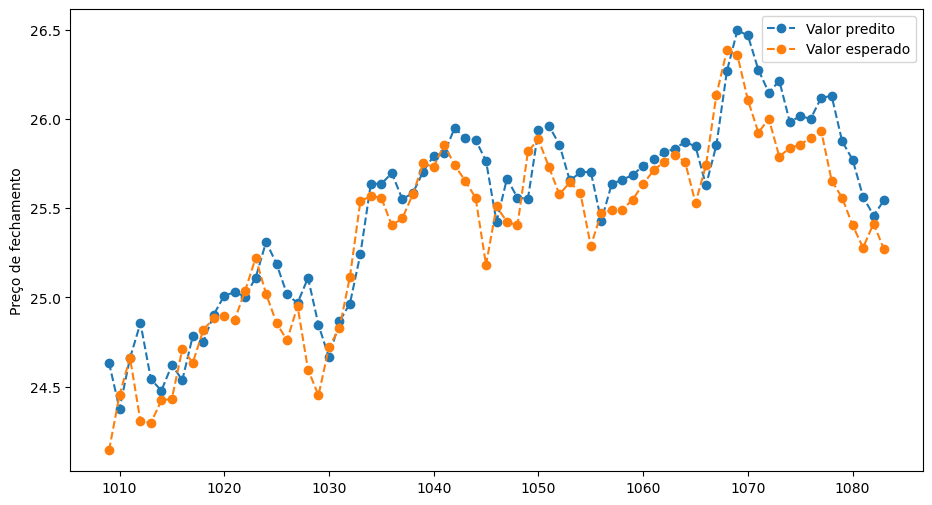

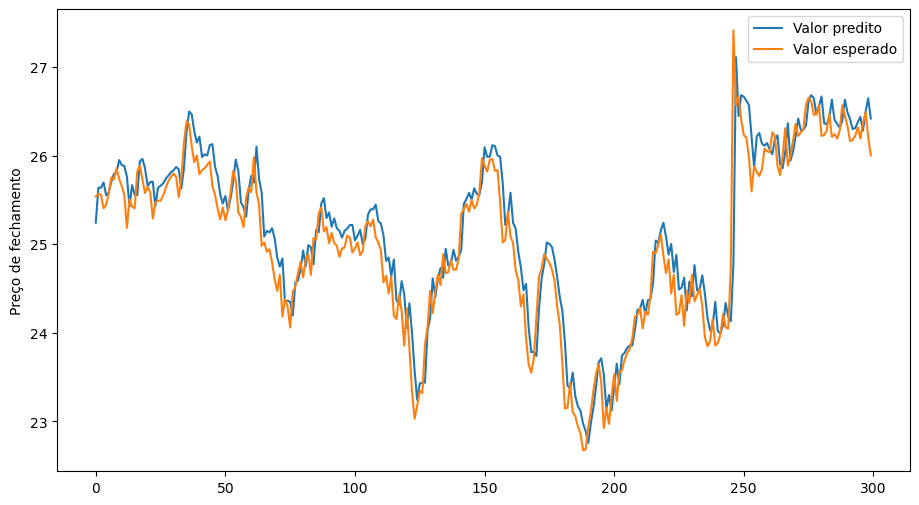

Modelo 5 nao encontrado!
Shape das entradas e saidas, para validacao:
(10899, 800, 14)
(10899,)
(2132, 800, 14)
(2132,)
67/67 [==============================] - 3s 41ms/step
melhor modelo lstm_800:
1
RMSE:
0.27166678564538793
MAPE:
0.009695888444286442
67/67 [==============================] - 3s 41ms/step


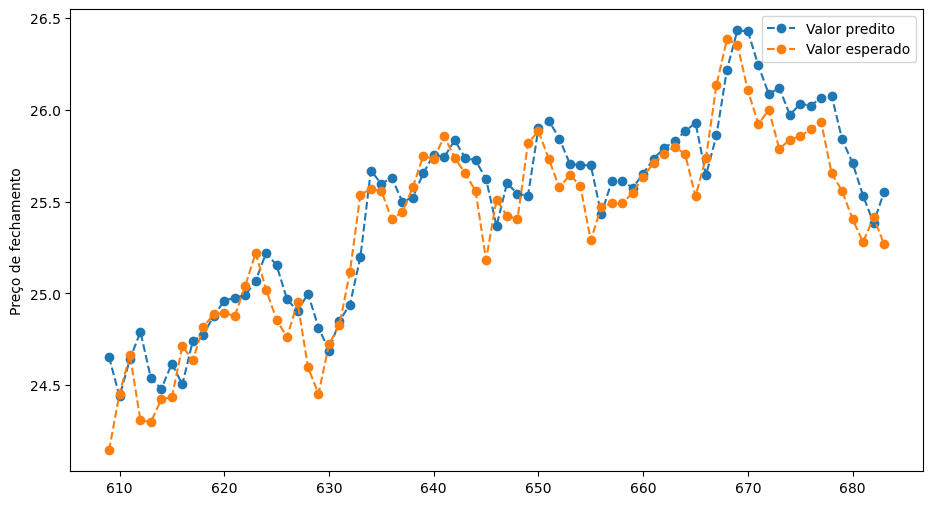

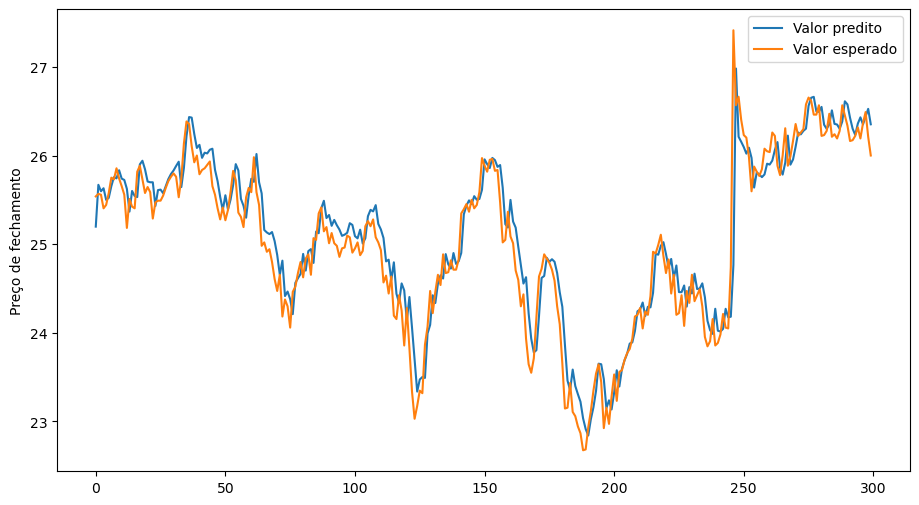

Modelo 5 nao encontrado!
Shape das entradas e saidas, para validacao:
(10699, 1000, 14)
(10699,)
(1932, 1000, 14)
(1932,)
61/61 [==============================] - 4s 53ms/step
melhor modelo lstm_1000:
2
RMSE:
0.3140399690105776
MAPE:
0.010063031750484614
61/61 [==============================] - 3s 53ms/step


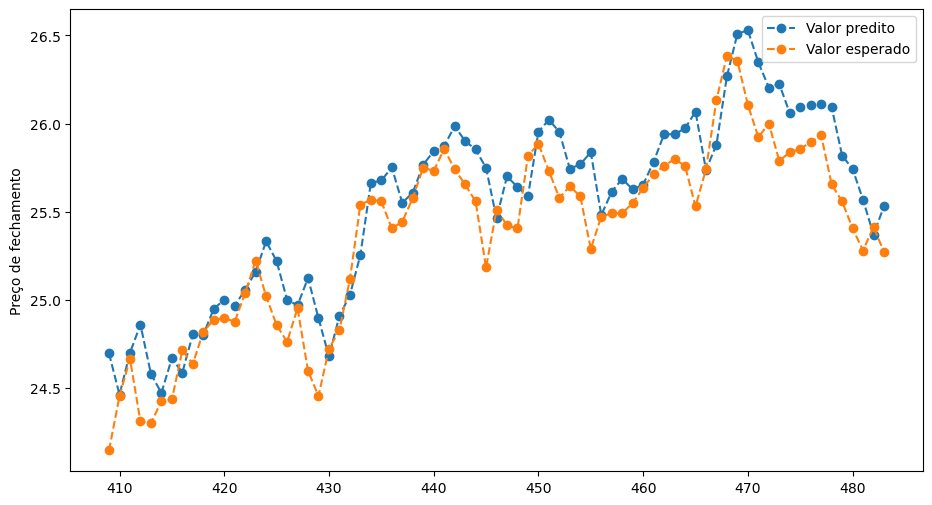

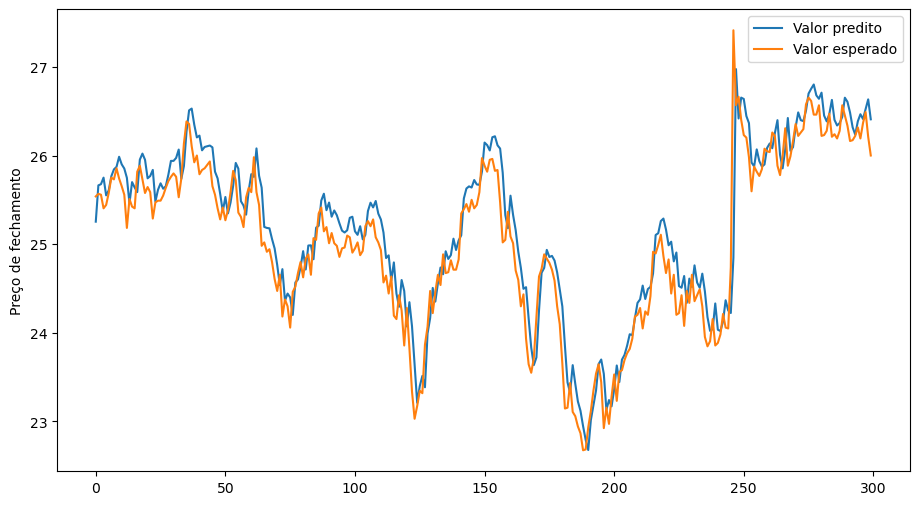

In [8]:
#diferentes tamanhos de memoria para os modelos treinados
possible_memory_sizes = [50,100,200,400,800,1000]

#carrega os modelos realiza as predicoes e escolhe o melhor modelo
for memory in possible_memory_sizes:
    lstm_memory = memory
    trained_models_lstm[str(lstm_memory)] = []
    
    #carrega os modelos
    for i in range(60):
        try:
            trained_models_lstm[str(lstm_memory)].append(kr.models.load_model('C:/Users/guilh/PythonCodes/Models/LSTM_predicting'+str(prediction_ahead)+'ahead_param_14_ts_'+ str(lstm_memory) +'_batch_256_earlystop_valloss_'+str(i)))
        except:
            print('Modelo ' + str(i) + ' nao encontrado!')
            break

    #reformatando os dados para o formato do modelo a validar
    trainInputX, trainInputY = sf.prepareData(trainX, trainY, lstm_memory)
    testInputX, testInputY = sf.prepareData(testX, testY, lstm_memory)
    print("Shape das entradas e saidas, para validacao:")
    print(trainInputX.shape)
    print(trainInputY.shape)
    print(testInputX.shape)
    print(testInputY.shape)

    trainInputX = trainInputX[:,:,0:14]
    testInputX = testInputX[:,:,0:14]

    #criando os vetores para armazenar os valores de erro para cada tamanho de memoria
    rmse_lstm[str(lstm_memory)] = []
    mape_lstm[str(lstm_memory)] = []
    for i in range(len(trained_models_lstm[str(lstm_memory)])):
        #Pegando o valor normalizado e deixando no shape desejado
        predito_normalizado = trained_models_lstm[str(lstm_memory)][i].predict(testInputX)[:,0]

        predito = denormalize_prediction(scaler,testInputX[:,(lstm_memory-1),:],predito_normalizado)[0:800]
        esperado = denormalize_prediction(scaler,testInputX[:,(lstm_memory-1),:],testInputY)[0:800]

        rmse_lstm[str(lstm_memory)].append(sf.rmse(predito,esperado))
        mape_lstm[str(lstm_memory)].append(sklearn.metrics.mean_absolute_percentage_error(esperado,predito))

    print("melhor modelo lstm_"+str(lstm_memory)+":")
    melhor_modelo_lstm[str(lstm_memory)] = rmse_lstm[str(lstm_memory)].index(min(rmse_lstm[str(lstm_memory)]))
    print(melhor_modelo_lstm[str(lstm_memory)])
    print("RMSE:")
    print(rmse_lstm[str(lstm_memory)][melhor_modelo_lstm[str(lstm_memory)]])
    print("MAPE:")
    print(mape_lstm[str(lstm_memory)][melhor_modelo_lstm[str(lstm_memory)]])
    

    #predicao do melhor modelo
    predito_normalizado = trained_models_lstm[str(lstm_memory)][melhor_modelo_lstm[str(lstm_memory)]].predict(testInputX)[:,0]
    predito_lstm[str(lstm_memory)] = denormalize_prediction(scaler,testInputX[:,(lstm_memory-1),:],predito_normalizado)
    esperado_lstm[str(lstm_memory)] = denormalize_prediction(scaler,testInputX[:,(lstm_memory-1),:],testInputY)

    #grafico com zoom
    starting_point = 1410
    ending_point = 1485

    x = list(range((starting_point-lstm_memory-prediction_ahead),(ending_point-lstm_memory-prediction_ahead)))
    plt.figure(figsize=(11, 6))
    plt.plot(x , predito_lstm[str(lstm_memory)][(starting_point-lstm_memory-prediction_ahead):(ending_point-lstm_memory-prediction_ahead)], label = "Valor predito ",linestyle='--', marker='o')
    plt.plot(x , esperado_lstm[str(lstm_memory)][(starting_point-lstm_memory-prediction_ahead):(ending_point-lstm_memory-prediction_ahead)], label = "Valor esperado",linestyle='--', marker='o')
    #plt.plot(x , testInputX[(starting_point-lstm_memory-prediction_ahead):(ending_point-lstm_memory-prediction_ahead),(lstm_memory-1),3], label = "Current value used for prediction",linestyle='--', marker='o')
    plt.ylabel('Preço de fechamento')
    plt.legend()
    plt.savefig("./Images/lstm_"+str(lstm_memory)+"_predictionahead_"+str(prediction_ahead)+"_smallsample.png")
    plt.show()
    
    #grafico com o final do conjunto de teste
    x = list(range(300))
    # titulo = 'Predição lstm memória '+str(lstm_memory)+', prevendo '+str(prediction_ahead)+' '+('valor' if prediction_ahead == 1 else 'valores')+' a frente de ações GE'
    # plt.title(titulo)
    plt.figure(figsize=(11, 6))
    plt.plot(x , predito_lstm[str(lstm_memory)][-1499:-1199], label = "Valor predito")
    plt.plot(x , esperado_lstm[str(lstm_memory)][-1499:-1199], label = "Valor esperado")
    plt.ylabel('Preço de fechamento')
    plt.legend()
    plt.savefig("./Images/lstm_"+str(lstm_memory)+"_predictionahead_"+str(prediction_ahead)+"_300last.png")
    plt.show()

Modelo 20 nao encontrado!
Shape das entradas e saidas, para validacao:
(11649, 50, 14)
(11649,)
(2882, 50, 14)
(2882,)
91/91 [==============================] - 0s 2ms/step
melhor modelo rnn_50:
8
RMSE:
0.42927100253587674
MAPE:
0.02087106125085626
91/91 [==============================] - 0s 2ms/step


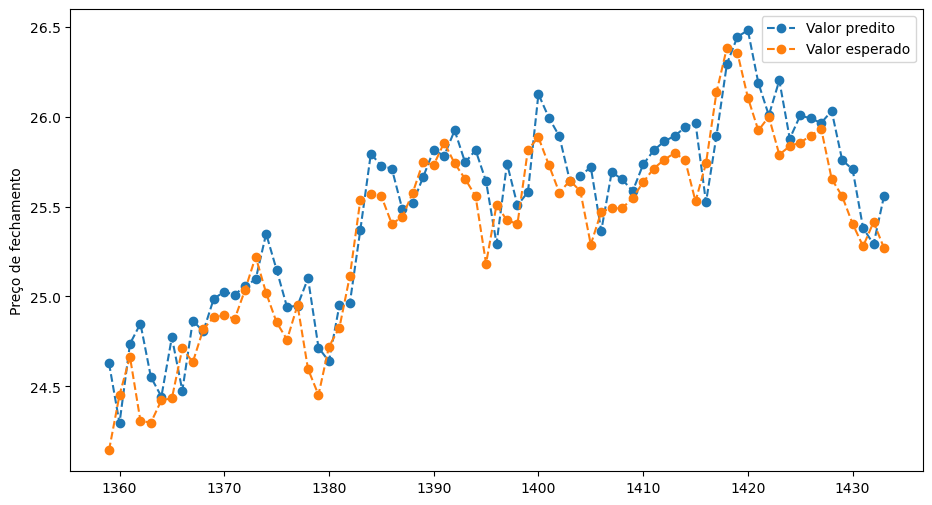

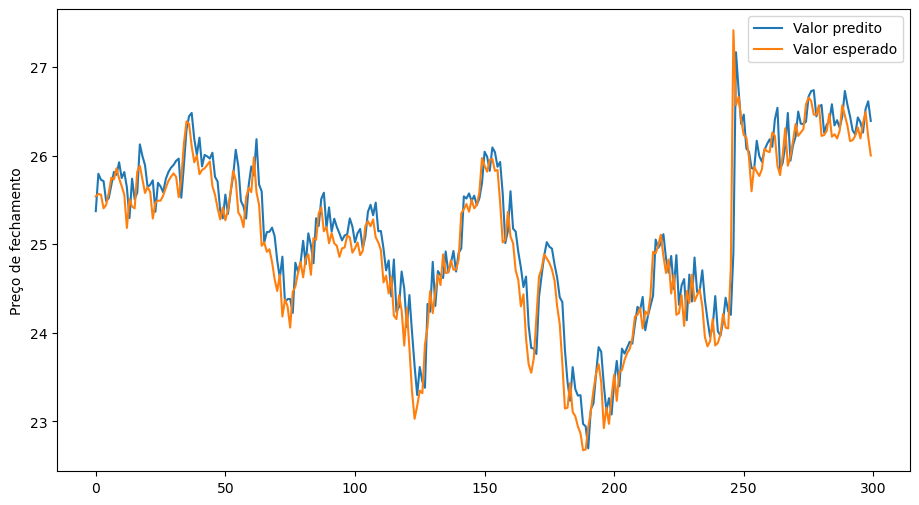

Modelo 20 nao encontrado!
Shape das entradas e saidas, para validacao:
(11599, 100, 14)
(11599,)
(2832, 100, 14)
(2832,)
89/89 [==============================] - 0s 3ms/step
melhor modelo rnn_100:
8
RMSE:
0.3701461950939484
MAPE:
0.0187718033048153
89/89 [==============================] - 0s 3ms/step


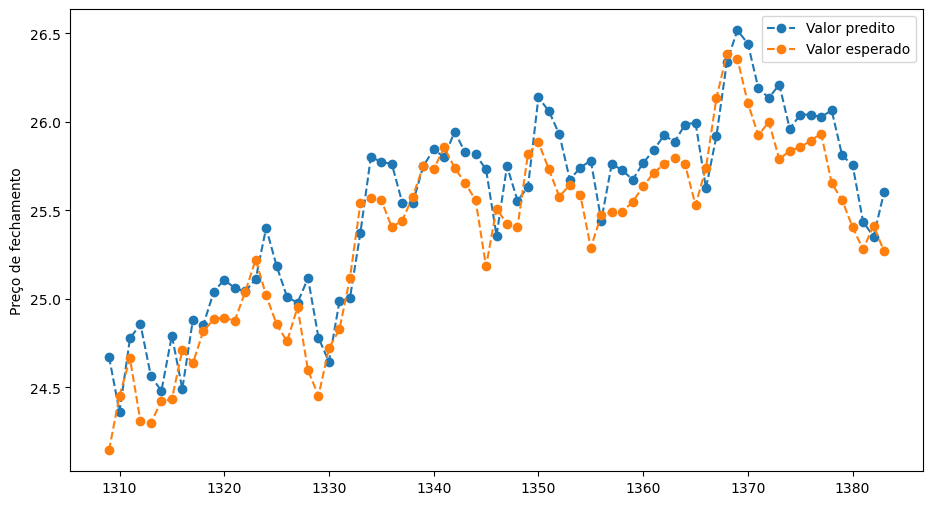

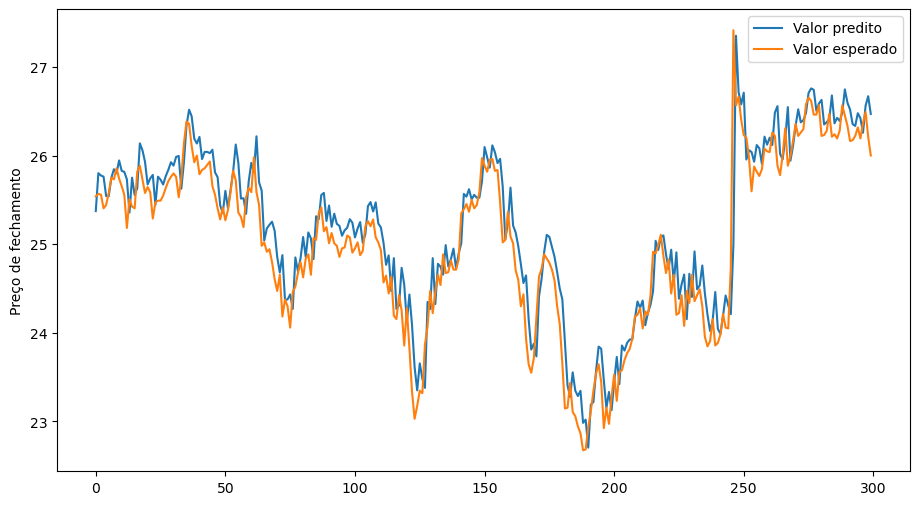

Modelo 20 nao encontrado!
Shape das entradas e saidas, para validacao:
(11499, 200, 14)
(11499,)
(2732, 200, 14)
(2732,)
86/86 [==============================] - 1s 6ms/step
melhor modelo rnn_200:
5
RMSE:
0.3089067920895678
MAPE:
0.014655494355276404
86/86 [==============================] - 1s 6ms/step


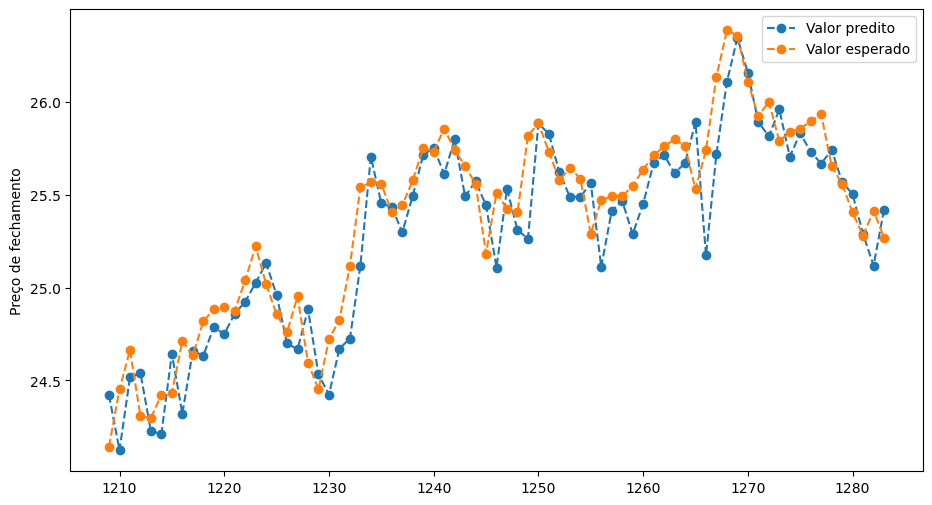

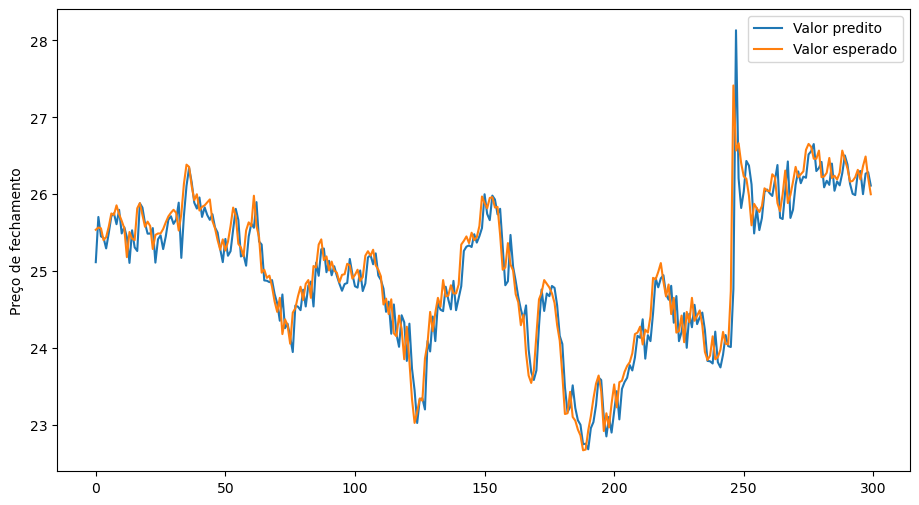

Modelo 10 nao encontrado!
Shape das entradas e saidas, para validacao:
(11299, 400, 14)
(11299,)
(2532, 400, 14)
(2532,)
80/80 [==============================] - 1s 12ms/step
melhor modelo rnn_400:
9
RMSE:
0.2948385197832833
MAPE:
0.012793636470855147
80/80 [==============================] - 1s 12ms/step


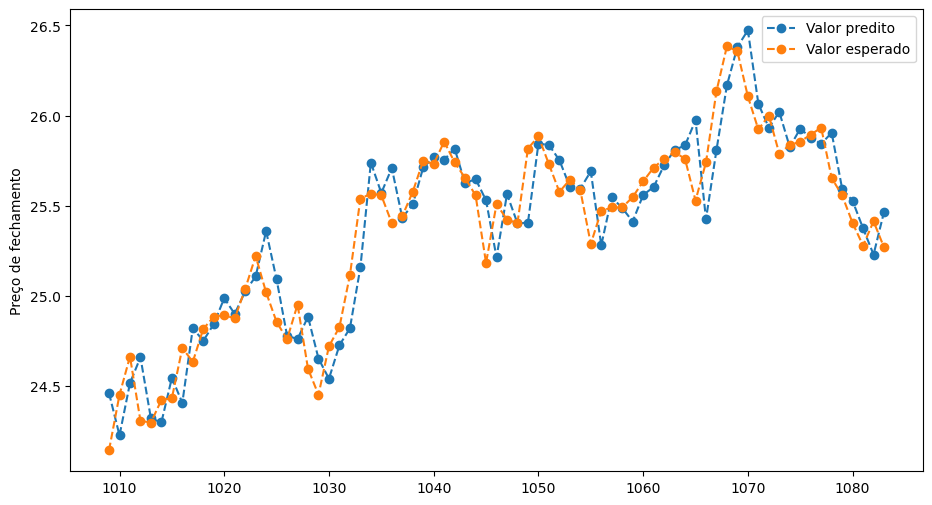

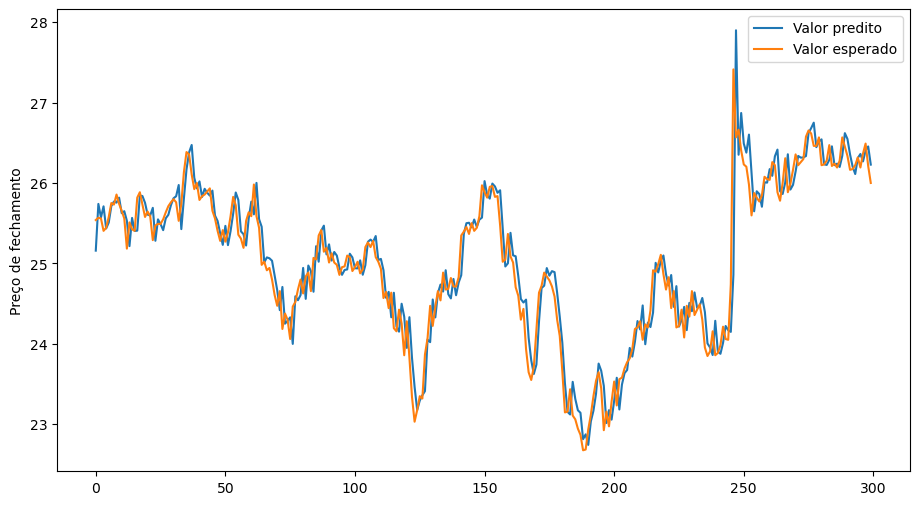

Modelo 5 nao encontrado!
Shape das entradas e saidas, para validacao:
(10899, 800, 14)
(10899,)
(2132, 800, 14)
(2132,)
67/67 [==============================] - 2s 24ms/step
melhor modelo rnn_800:
0
RMSE:
0.32592155186468874
MAPE:
0.012060527697816964
67/67 [==============================] - 2s 24ms/step


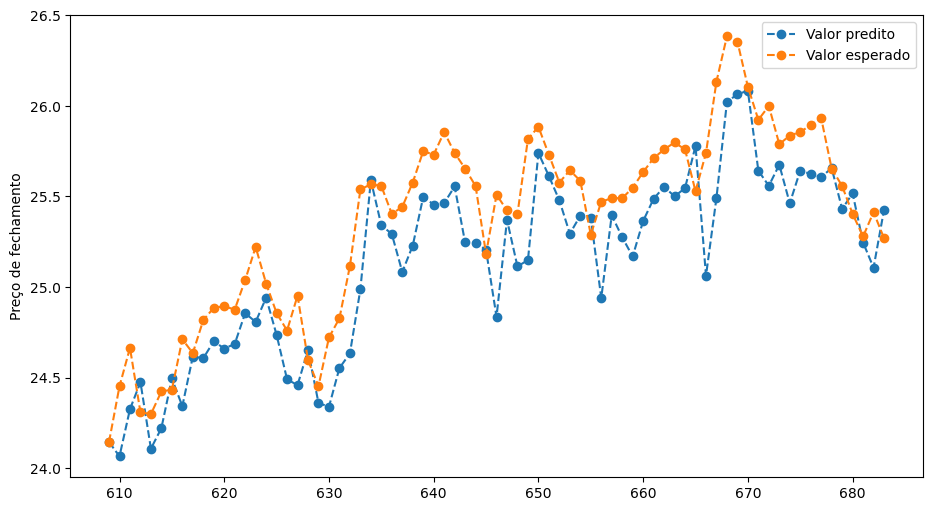

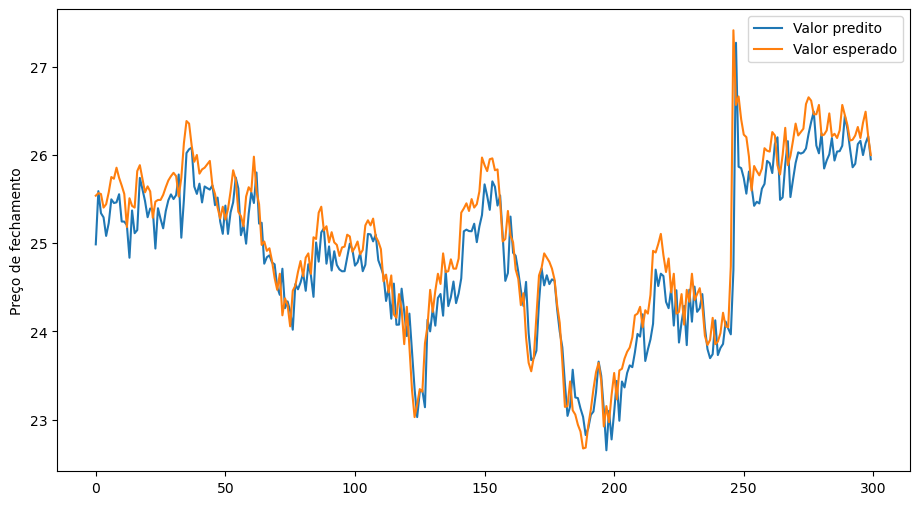

Modelo 5 nao encontrado!
Shape das entradas e saidas, para validacao:
(10699, 1000, 14)
(10699,)
(1932, 1000, 14)
(1932,)
61/61 [==============================] - 2s 30ms/step
melhor modelo rnn_1000:
0
RMSE:
0.2868308757973156
MAPE:
0.009066601074943958
61/61 [==============================] - 2s 30ms/step


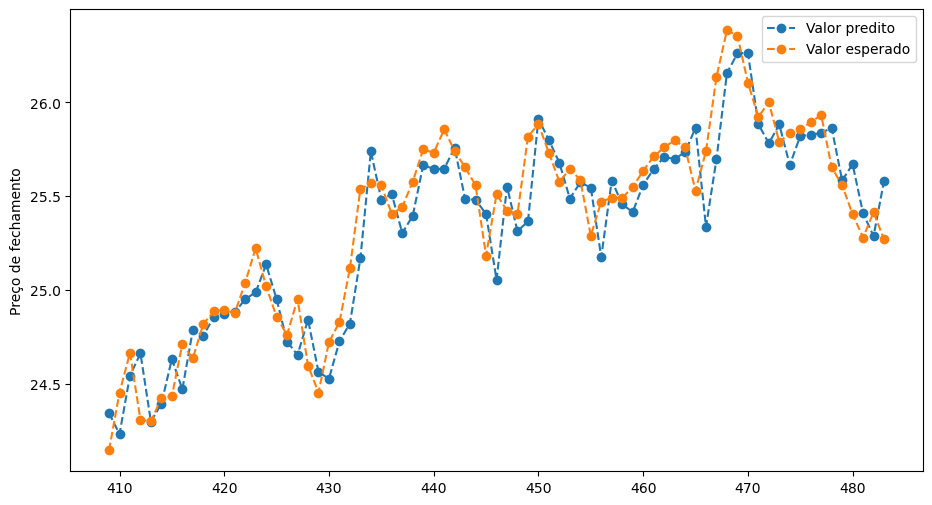

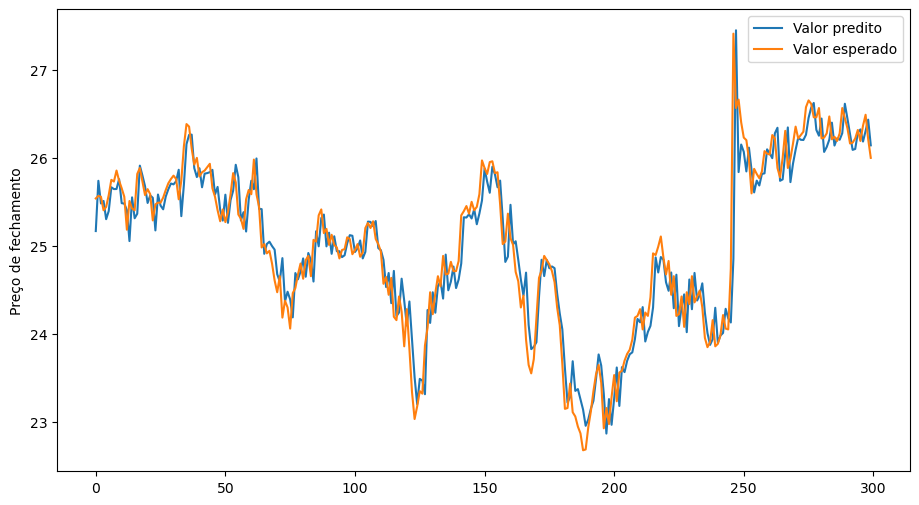

In [9]:
#diferentes tamanhos de memoria para os modelos treinados
possible_memory_sizes = [50,100,200,400,800,1000]

#carrega os modelos realiza as predicoes e escolhe o melhor modelo
for memory in possible_memory_sizes:
    rnn_memory = memory
    trained_models_rnn[str(rnn_memory)] = []

    #carrega modelos
    for i in range(60):
        try:
            trained_models_rnn[str(rnn_memory)].append(kr.models.load_model('C:/Users/guilh/PythonCodes/Models/RNN_predicting'+str(prediction_ahead)+'ahead_param_14_ts_'+ str(rnn_memory) +'_batch_256_earlystop_valloss_'+str(i)))
        except:
            print('Modelo ' + str(i) + ' nao encontrado!')
            break

    #reformatando os dados para o formato do modelo a validar
    trainInputX, trainInputY = sf.prepareData(trainX, trainY, rnn_memory)
    testInputX, testInputY = sf.prepareData(testX, testY, rnn_memory)
    print("Shape das entradas e saidas, para validacao:")
    print(trainInputX.shape)
    print(trainInputY.shape)
    print(testInputX.shape)
    print(testInputY.shape)

    trainInputX = trainInputX [:,:,0:14]
    testInputX = testInputX [:,:,0:14]

    rmse_rnn[str(rnn_memory)] = []
    mape_rnn[str(rnn_memory)] = []
    for i in range(len(trained_models_rnn[str(rnn_memory)])):
        #Pegando o valor normalizado e deixando no shape desejado
        predito_normalizado = trained_models_rnn[str(rnn_memory)][i].predict(testInputX)[:,0]

        predito = denormalize_prediction(scaler,testInputX[:,(rnn_memory-1),:],predito_normalizado)[0:800]
        esperado = denormalize_prediction(scaler,testInputX[:,(rnn_memory-1),:],testInputY)[0:800]

        rmse_rnn[str(rnn_memory)].append(sf.rmse(predito,esperado))
        mape_rnn[str(rnn_memory)].append(sklearn.metrics.mean_absolute_percentage_error(esperado,predito))

    print("melhor modelo rnn_"+str(rnn_memory)+":")
    melhor_modelo_rnn[str(rnn_memory)] = rmse_rnn[str(rnn_memory)].index(min(rmse_rnn[str(rnn_memory)]))
    print(melhor_modelo_rnn[str(rnn_memory)])
    print("RMSE:")
    print(rmse_rnn[str(rnn_memory)][melhor_modelo_rnn[str(rnn_memory)]])
    print("MAPE:")
    print(mape_rnn[str(rnn_memory)][melhor_modelo_rnn[str(rnn_memory)]])
    
    #predicao do melhor modelo
    predito_normalizado = trained_models_rnn[str(rnn_memory)][melhor_modelo_rnn[str(rnn_memory)]].predict(testInputX)[:,0]
    predito_rnn[str(rnn_memory)] = denormalize_prediction(scaler,testInputX[:,(rnn_memory-1),:],predito_normalizado)
    esperado_rnn[str(rnn_memory)] = denormalize_prediction(scaler,testInputX[:,(rnn_memory-1),:],testInputY)
    
    #grafico com zoom
    starting_point = 1410
    ending_point = 1485

    x = list(range((starting_point-rnn_memory-prediction_ahead),(ending_point-rnn_memory-prediction_ahead)))
    plt.figure(figsize=(11, 6))
    plt.plot(x , predito_rnn[str(rnn_memory)][(starting_point-rnn_memory-prediction_ahead):(ending_point-rnn_memory-prediction_ahead)], label = "Valor predito ",linestyle='--', marker='o')
    plt.plot(x , esperado_rnn[str(rnn_memory)][(starting_point-rnn_memory-prediction_ahead):(ending_point-rnn_memory-prediction_ahead)], label = "Valor esperado",linestyle='--', marker='o')
    #plt.plot(x , testInputX[(starting_point-rnn_memory-prediction_ahead):(ending_point-rnn_memory-prediction_ahead),(lstm_memory-1),3], label = "Current value used for prediction",linestyle='--', marker='o')
    plt.ylabel('Preço de fechamento')
    plt.legend()
    plt.savefig("./Images/rnn_"+str(rnn_memory)+"_predictionahead_"+str(prediction_ahead)+"_smallsample.png")
    plt.show()
    

    #grafico com o final do conjunto de teste
    x = list(range(300))
    # titulo = 'Predição RNN memória '+str(rnn_memory)+', prevendo '+str(prediction_ahead)+' '+('valor' if prediction_ahead == 1 else 'valores')+' a frente de ações GE'
    # plt.title(titulo)
    plt.figure(figsize=(11, 6))
    plt.plot(x , predito_rnn[str(rnn_memory)][-1499:-1199], label = "Valor predito")
    plt.plot(x , esperado_rnn[str(rnn_memory)][-1499:-1199], label = "Valor esperado")
    plt.ylabel('Preço de fechamento')
    plt.legend()
    plt.savefig("./Images/rnn_"+str(rnn_memory)+"_predictionahead_"+str(prediction_ahead)+"_300last.png")
    plt.show()

Shape das entradas e saidas, para validacao:
(11699, 14)
(11699,)
(2932, 14)
(2932,)
92/92 [==============================] - 0s 473us/step
melhor modelo mlp:
4
RMSE:
0.45616024276829076
MAPE:
0.020179826330692797
92/92 [==============================] - 0s 462us/step


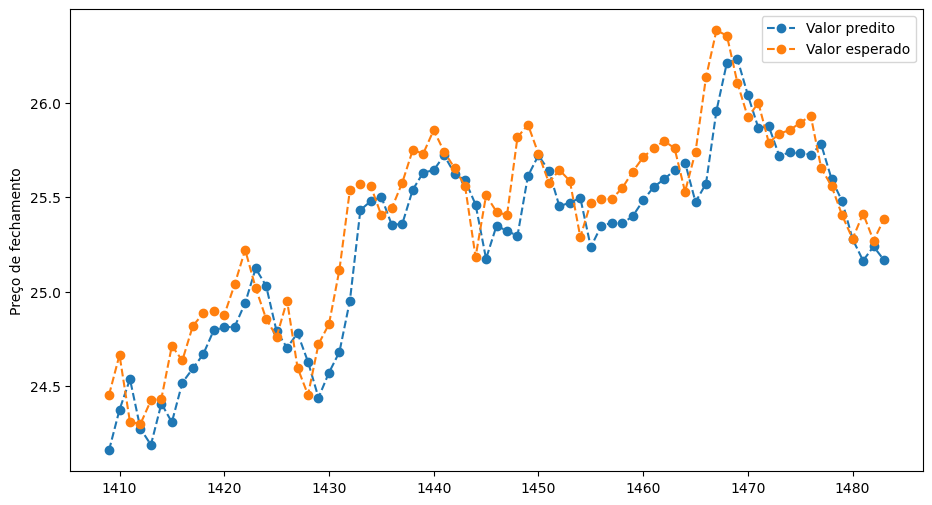

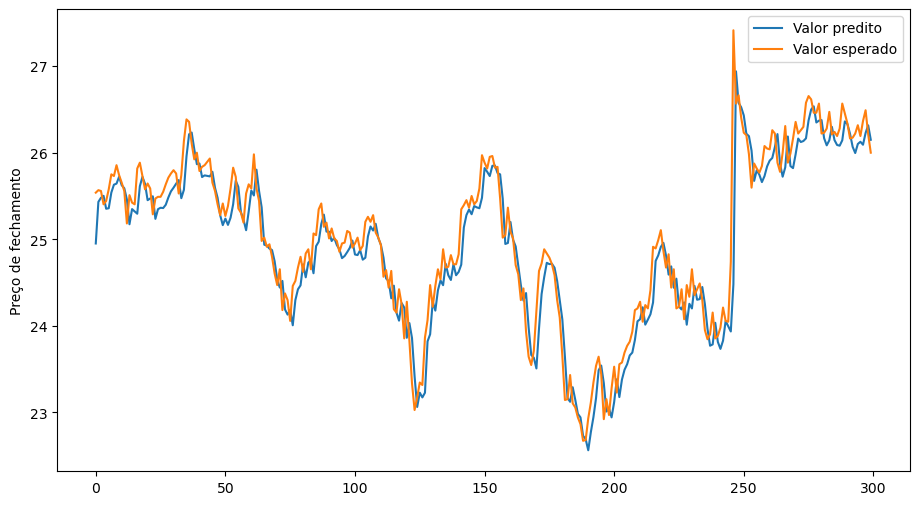

In [10]:
trained_models_mlp = []

for i in range(60):
    try:
        trained_models_mlp.append(kr.models.load_model('C:/Users/guilh/PythonCodes/Models/MLP_predicting'+str(prediction_ahead)+'ahead_param_14_32_32_32_8_batch_256_earlystop_valloss_'+str(i)))
    except:
        print('Modelo ' + str(i) + ' nao encontrado!')
        break

trainInputX = trainX
trainInputY = trainY
testInputX = testX
testInputY = testY

print("Shape das entradas e saidas, para validacao:")
print(trainInputX.shape)
print(trainInputY.shape)
print(testInputX.shape)
print(testInputY.shape)

trainInputX = trainInputX [:,0:14]
testInputX = testInputX [:,0:14]

rmse_mlp = []
mape_mlp = []
for i in range(len(trained_models_mlp)):
    #Pegando o valor normalizado e deixando no shape desejado
    predito_normalizado = trained_models_mlp[i].predict(testInputX)[:,0]

    predito = denormalize_prediction(scaler,testInputX[:,:],predito_normalizado)[0:800]
    esperado = denormalize_prediction(scaler,testInputX[:,:],testInputY)[0:800]

    rmse_mlp.append(sf.rmse(predito,esperado))
    mape_mlp.append(sklearn.metrics.mean_absolute_percentage_error(esperado,predito))

print("melhor modelo mlp:")
melhor_modelo_mlp = rmse_mlp.index(min(rmse_mlp))
print(melhor_modelo_mlp)
print("RMSE:")
print(rmse_mlp[melhor_modelo_mlp])
print("MAPE:")
print(mape_mlp[melhor_modelo_mlp])

#predicao do melhor modelo
predito_normalizado = trained_models_mlp[melhor_modelo_mlp].predict(testInputX)[:,0]
predito_mlp = denormalize_prediction(scaler,testInputX[:,:],predito_normalizado)[:-1]
esperado_mlp = denormalize_prediction(scaler,testInputX[:,:],testInputY)[:-1]

#grafico com zoom
starting_point = 1410
ending_point = 1485

x = list(range((starting_point-prediction_ahead),(ending_point-prediction_ahead)))
plt.figure(figsize=(11, 6))
plt.plot(x , predito_mlp[(starting_point-prediction_ahead):(ending_point-prediction_ahead)], label = "Valor predito ",linestyle='--', marker='o')
plt.plot(x , esperado_mlp[(starting_point-prediction_ahead):(ending_point-prediction_ahead)], label = "Valor esperado",linestyle='--', marker='o')
#plt.plot(x , testInputX[(starting_point-prediction_ahead):(ending_point-prediction_ahead),(lstm_memory-1),3], label = "Current value used for prediction",linestyle='--', marker='o')
plt.ylabel('Preço de fechamento')
plt.legend()
plt.savefig("./Images/mlp_14_32_32_32_8_predictionahead_"+str(prediction_ahead)+"_smallsample.png")
plt.show()

#grafico com o final do conjunto de teste
x = list(range(300))
# titulo = 'Predição mlp, prevendo '+str(prediction_ahead)+' '+('valor' if prediction_ahead == 1 else 'valores')+' a frente de ações GE'
# plt.title(titulo)
plt.figure(figsize=(11, 6))
plt.plot(x , predito_mlp[-1499:-1199], label = "Valor predito")
plt.plot(x , esperado_mlp[-1499:-1199], label = "Valor esperado")
plt.ylabel('Preço de fechamento')
plt.legend()
plt.savefig("./Images/mlp_14_32_32_32_8_predictionahead_"+str(prediction_ahead)+"_300last.png")
plt.show()

In [11]:
#dicionarios com os valores de erros dos melhores modelos
rmse_list = dict()
mape_list = dict()

rmse_list['RNN50'] = (min(rmse_rnn['50'][:]),rmse_rnn['50'].index(min(rmse_rnn['50'])))
rmse_list['RNN100'] = (min(rmse_rnn['100'][:]),rmse_rnn['100'].index(min(rmse_rnn['100'])))
rmse_list['RNN200'] = (min(rmse_rnn['200'][:]),rmse_rnn['200'].index(min(rmse_rnn['200'])))
rmse_list['RNN400'] = (min(rmse_rnn['400'][:]),rmse_rnn['400'].index(min(rmse_rnn['400'])))
rmse_list['RNN800'] = (min(rmse_rnn['800'][:]),rmse_rnn['800'].index(min(rmse_rnn['800'])))
rmse_list['RNN1000'] = (min(rmse_rnn['1000'][:]),rmse_rnn['1000'].index(min(rmse_rnn['1000'])))
rmse_list['LSTM50'] = (min(rmse_lstm['50'][:]),rmse_lstm['50'].index(min(rmse_lstm['50'])))
rmse_list['LSTM100'] = (min(rmse_lstm['100'][:]),rmse_lstm['100'].index(min(rmse_lstm['100'])))
rmse_list['LSTM200'] = (min(rmse_lstm['200'][:]),rmse_lstm['200'].index(min(rmse_lstm['200'])))
rmse_list['LSTM400'] = (min(rmse_lstm['400'][:]),rmse_lstm['400'].index(min(rmse_lstm['400'])))
rmse_list['LSTM800'] = (min(rmse_lstm['800'][:]),rmse_lstm['800'].index(min(rmse_lstm['800'])))
rmse_list['LSTM1000'] = (min(rmse_lstm['1000'][:]),rmse_lstm['1000'].index(min(rmse_lstm['1000'])))
rmse_list['MLP'] = (min(rmse_mlp),rmse_mlp.index(min(rmse_mlp)))

mape_list['RNN50'] = (min(mape_rnn['50'][:]),mape_rnn['50'].index(min(mape_rnn['50'])))
mape_list['RNN100'] = (min(mape_rnn['100'][:]),mape_rnn['100'].index(min(mape_rnn['100'])))
mape_list['RNN200'] = (min(mape_rnn['200'][:]),mape_rnn['200'].index(min(mape_rnn['200'])))
mape_list['RNN400'] = (min(mape_rnn['400'][:]),mape_rnn['400'].index(min(mape_rnn['400'])))
mape_list['RNN800'] = (min(mape_rnn['800'][:]),mape_rnn['800'].index(min(mape_rnn['800'])))
mape_list['RNN1000'] = (min(mape_rnn['1000'][:]),mape_rnn['1000'].index(min(mape_rnn['1000'])))
mape_list['LSTM50'] = (min(mape_lstm['50'][:]),mape_lstm['50'].index(min(mape_lstm['50'])))
mape_list['LSTM100'] = (min(mape_lstm['100'][:]),mape_lstm['100'].index(min(mape_lstm['100'])))
mape_list['LSTM200'] = (min(mape_lstm['200'][:]),mape_lstm['200'].index(min(mape_lstm['200'])))
mape_list['LSTM400'] = (min(mape_lstm['400'][:]),mape_lstm['400'].index(min(mape_lstm['400'])))
mape_list['LSTM800'] = (min(mape_lstm['800'][:]),mape_lstm['800'].index(min(mape_lstm['800'])))
mape_list['LSTM1000'] = (min(mape_lstm['1000'][:]),mape_lstm['1000'].index(min(mape_lstm['1000'])))
mape_list['MLP'] = (min(mape_mlp),mape_mlp.index(min(mape_mlp)))

print("RMSE Modelos predicao dias para frente = "+str(prediction_ahead))
display(rmse_list)
print("MAPE Modelos predicao dias para frente = "+str(prediction_ahead))
display(mape_list)

RMSE Modelos predicao dias para frente = 1


{'RNN50': (0.42927100253587674, 8),
 'RNN100': (0.3701461950939484, 8),
 'RNN200': (0.3089067920895678, 5),
 'RNN400': (0.2948385197832833, 9),
 'RNN800': (0.32592155186468874, 0),
 'RNN1000': (0.2868308757973156, 0),
 'LSTM50': (0.43722004010197635, 0),
 'LSTM100': (0.3890975789385635, 0),
 'LSTM200': (0.3072671070794551, 0),
 'LSTM400': (0.28828603048493245, 0),
 'LSTM800': (0.27166678564538793, 1),
 'LSTM1000': (0.3140399690105776, 2),
 'MLP': (0.45616024276829076, 4)}

MAPE Modelos predicao dias para frente = 1


{'RNN50': (0.02087106125085626, 8),
 'RNN100': (0.0187718033048153, 8),
 'RNN200': (0.014655494355276404, 5),
 'RNN400': (0.012793636470855147, 9),
 'RNN800': (0.012060527697816964, 0),
 'RNN1000': (0.009066601074943958, 0),
 'LSTM50': (0.0220761358640452, 2),
 'LSTM100': (0.0206225516426369, 0),
 'LSTM200': (0.014510918039497951, 14),
 'LSTM400': (0.012354527213849123, 0),
 'LSTM800': (0.009695888444286442, 1),
 'LSTM1000': (0.010063031750484614, 2),
 'MLP': (0.020179826330692797, 4)}

In [12]:
def dif_perc(current_value,next_value):
    return abs((next_value/current_value)-1)

def dif_perc_category(current_value,next_value):
    percentual_diff = (next_value/current_value)-1
    
    category = ""
    
    if percentual_diff >= 0.005:
        category = "UP"
    elif percentual_diff <= -0.005:
        category = "DOWN"
    else:
        category = "SAME"
        
    return category

def price_movement(predito,esperado,prediction_ahead):
    predito_dif = []
    esperado_dif = []
    for i in range((len(predito)-prediction_ahead)):
        predito_dif.append(dif_perc_category(esperado[i],predito[(i+prediction_ahead)]))
        esperado_dif.append(dif_perc_category(esperado[i],esperado[(i+prediction_ahead)]))
        
    return predito_dif, esperado_dif

In [13]:
accuracy_rnn = dict()
accuracy_lstm = dict()

for mem in possible_memory_sizes:
    predito_rnn_categoria, esperado_rnn_categoria = price_movement(predito_rnn[str(mem)],esperado_rnn[str(mem)],prediction_ahead)
    predito_lstm_categoria, esperado_lstm_categoria = price_movement(predito_lstm[str(mem)],esperado_lstm[str(mem)],prediction_ahead)
    accuracy_rnn[mem] = sklearn.metrics.accuracy_score(esperado_rnn_categoria,predito_rnn_categoria)
    accuracy_lstm[mem] = sklearn.metrics.accuracy_score(esperado_lstm_categoria,predito_lstm_categoria)
    
predito_mlp_categoria, esperado_mlp_categoria = price_movement(predito_mlp,esperado_mlp,prediction_ahead)
accuracy_mlp = sklearn.metrics.accuracy_score(esperado_mlp_categoria,predito_mlp_categoria)

In [14]:
#lista com todas as acuracias
models_accuracy = []

models_accuracy.append(accuracy_mlp)
print("Modelo MLP:")
print(accuracy_mlp)

for mem in possible_memory_sizes:
    models_accuracy.append(accuracy_rnn[mem])
    print("Modelo RNN" + str(mem) + ":")
    print(accuracy_rnn[mem])
    
for mem in possible_memory_sizes:
    models_accuracy.append(accuracy_lstm[mem])
    print("Modelo LSTM" + str(mem) + ":")
    print(accuracy_lstm[mem])

Modelo MLP:
0.34266211604095564
Modelo RNN50:
0.3582089552238806
Modelo RNN100:
0.3447545037089368
Modelo RNN200:
0.3738557305016477
Modelo RNN400:
0.375345713156855
Modelo RNN800:
0.333176912247771
Modelo RNN1000:
0.40290005178663907
Modelo LSTM50:
0.38215897257896564
Modelo LSTM100:
0.3726598375132462
Modelo LSTM200:
0.37458806298059316
Modelo LSTM400:
0.3666534966416436
Modelo LSTM800:
0.37587986860628814
Modelo LSTM1000:
0.3485240807871569


Acuracia por modelo


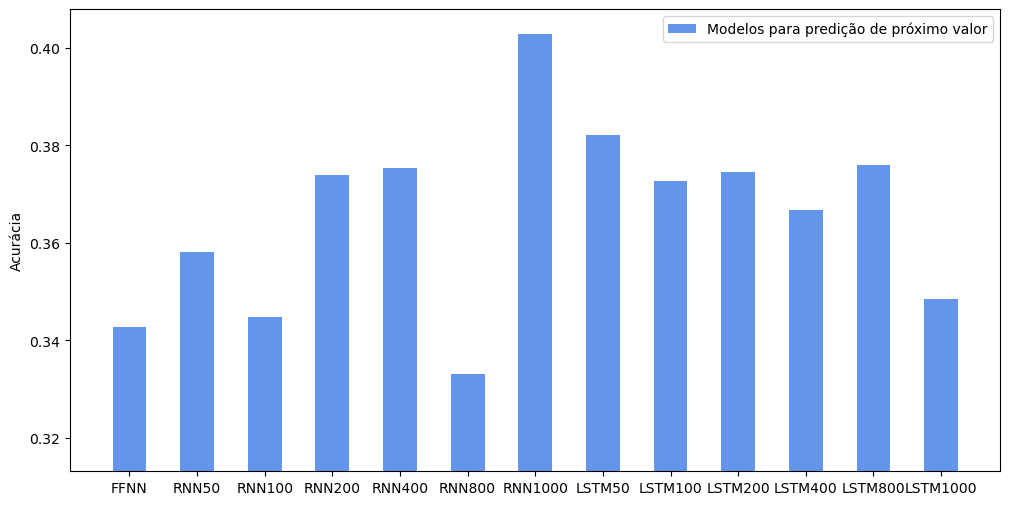

In [15]:
print("Acuracia por modelo")
x = ['FFNN','RNN50','RNN100','RNN200','RNN400','RNN800','RNN1000','LSTM50','LSTM100','LSTM200','LSTM400','LSTM800','LSTM1000']
plt.figure(figsize=(12, 6))
plt.bar(x ,models_accuracy, align = 'center', width = 0.5, color = 'cornflowerblue', label = 'Modelos para predição de próximo valor')
plt.ylim(bottom = min(models_accuracy)-0.02, top= max(models_accuracy)+0.005)
plt.ylabel('Acurácia')
plt.legend()
plt.savefig("./Images/nextvalue_prediction_accuracy_comparison.png")
plt.show()

In [16]:
#RMSE deloscando a janela de previsao para tras
risked_prediction_rmse_mlp = sf.rmse(predito_mlp[-999:],esperado_mlp[-(999+prediction_ahead):-prediction_ahead])

print("RMSE do quanto a rede se distanciou da entrada")
print(risked_prediction_rmse_mlp)

risked_prediction_rmse_rnn = dict()
risked_prediction_rmse_lstm = dict()

for mem in possible_memory_sizes:
    risked_prediction_rmse_rnn[str(mem)] = sf.rmse(predito_rnn[str(mem)][-999:],esperado_rnn[str(mem)][-(999+prediction_ahead):-prediction_ahead])
    print(risked_prediction_rmse_rnn[str(mem)])
    
for mem in possible_memory_sizes:
    risked_prediction_rmse_lstm[str(mem)] = sf.rmse(predito_lstm[str(mem)][-999:],esperado_lstm[str(mem)][-(999+prediction_ahead):-prediction_ahead])
    print(risked_prediction_rmse_lstm[str(mem)])

#MAPE deloscando a janela de previsao para tras
print("Mape do quanto a rede se distanciou da entrada:")
risked_prediction_mape_mlp = sklearn.metrics.mean_absolute_percentage_error(esperado_mlp[-(999+prediction_ahead):-prediction_ahead], predito_mlp[-999:])
print(risked_prediction_mape_mlp)

risked_prediction_mape_rnn = dict()
risked_prediction_mape_lstm = dict()

for mem in possible_memory_sizes:
    risked_prediction_mape_rnn[str(mem)] = sklearn.metrics.mean_absolute_percentage_error(esperado_rnn[str(mem)][-(999+prediction_ahead):-prediction_ahead], predito_rnn[str(mem)][-999:])
    print(risked_prediction_mape_rnn[str(mem)])

for mem in possible_memory_sizes:
    risked_prediction_mape_lstm[str(mem)] = sklearn.metrics.mean_absolute_percentage_error(esperado_lstm[str(mem)][-(999+prediction_ahead):-prediction_ahead], predito_lstm[str(mem)][-999:])
    print(risked_prediction_mape_lstm[str(mem)])

RMSE do quanto a rede se distanciou da entrada
0.11949827229043163
0.19353258745503912
0.22488992276575337
0.19861888090444318
0.21071035084934162
0.2789024509803339
0.23304540298364113
0.18311509229333825
0.17837867505265553
0.1767418585171293
0.19475545223090673
0.26939298105492887
0.22851576857001782
Mape do quanto a rede se distanciou da entrada:
0.005554473818221765
0.009857571128872915
0.011568415004658479
0.010987394714848372
0.012343358263327314
0.015076423403347089
0.014294985024672982
0.011291322841503828
0.010845008179357555
0.010455616060019697
0.010960190977599019
0.015852140498088814
0.013823522933558513


MLP deslocada:
RNN1000 deslocada:
LSTM800 deslocada:


[]

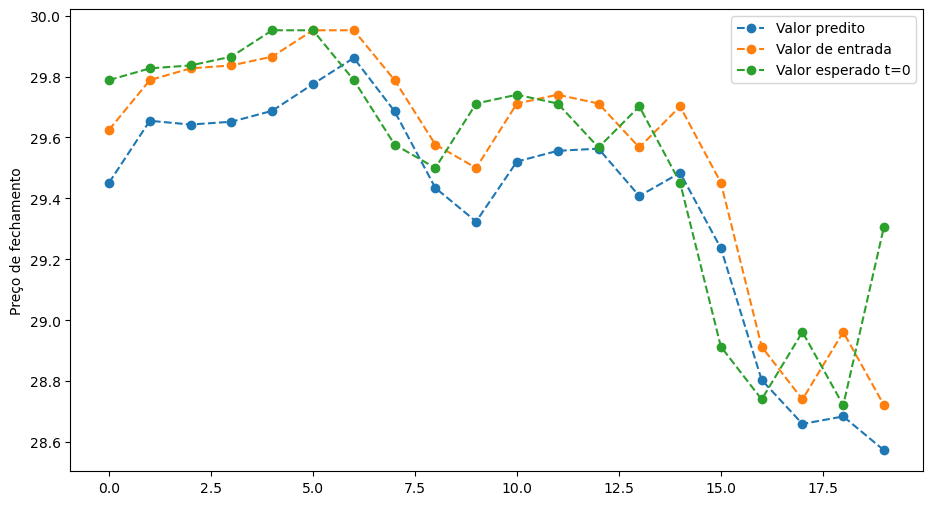

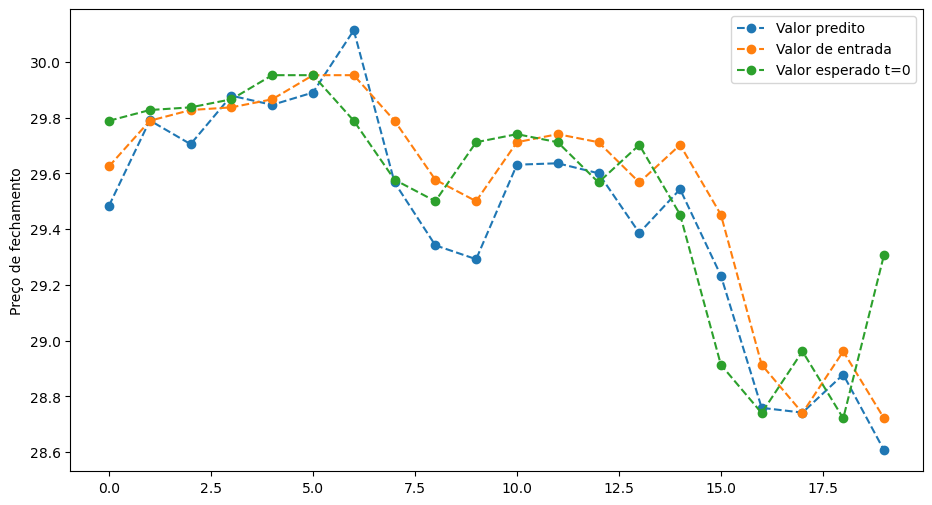

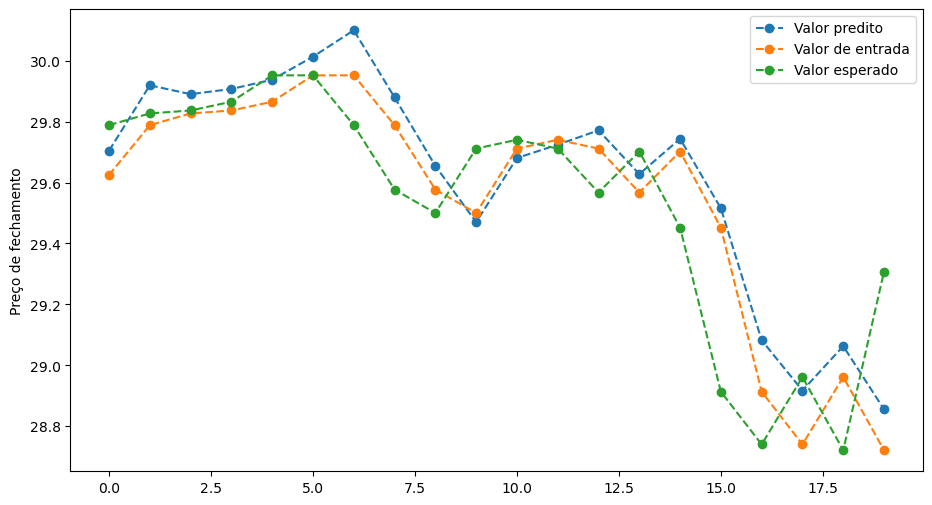

In [17]:
#Valores preditos pela MLP deslocados pela quantidade de passos que tento prever no futuro
print("MLP deslocada:")
x = list(range(20))
plt.figure(figsize=(11, 6))
plt.plot(x , predito_mlp[-999:][:20], label = "Valor predito",linestyle='--', marker='o')
plt.plot(x , esperado_mlp[-(999+prediction_ahead):-prediction_ahead][:20], label = "Valor de entrada",linestyle='--', marker='o')
plt.plot(x , esperado_mlp[-999:][:20], label = "Valor esperado t=0",linestyle='--', marker='o')
plt.ylabel('Preço de fechamento')
plt.legend()
plt.savefig("./Images/ahead1_dislocated_values_mlp.png")
plt.plot()

#Valores preditos pela RNN1000 deslocados pela quantidade de passos que tento prever no futuro
print("RNN1000 deslocada:")
x = list(range(20))
plt.figure(figsize=(11, 6))
plt.plot(x , predito_rnn['1000'][-999:][:20], label = "Valor predito",linestyle='--', marker='o')
plt.plot(x, esperado_rnn['1000'][-(999+prediction_ahead):-prediction_ahead][:20], label = "Valor de entrada",linestyle='--', marker='o')
plt.plot(x , esperado_rnn['1000'][-999:][:20], label = "Valor esperado t=0",linestyle='--', marker='o')
plt.ylabel('Preço de fechamento')
plt.legend()
plt.savefig("./Images/ahead1_dislocated_values_rnn.png")
plt.plot()

#Valores preditos pela LSTM800 deslocados pela quantidade de passos que tento prever no futuro
print("LSTM800 deslocada:")
x = list(range(20))
plt.figure(figsize=(11, 6))
plt.plot(x , predito_lstm['800'][-999:][:20], label = "Valor predito",linestyle='--', marker='o')
plt.plot(x, esperado_lstm['800'][-(999+prediction_ahead):-prediction_ahead][:20], label = "Valor de entrada",linestyle='--', marker='o')
plt.plot(x , esperado_lstm['800'][-999:][:20], label = "Valor esperado",linestyle='--', marker='o')
plt.ylabel('Preço de fechamento')
plt.legend()
plt.savefig("./Images/ahead1_dislocated_values_lstm.png")
plt.plot()

In [18]:
#validando o erro em janelas de tempo
evaluation_window = 100
total_window = len(esperado_mlp)

mlp_window_rmse  = []

rnn_window_rmse = dict()
lstm_window_rmse = dict()

for mem in possible_memory_sizes:
    rnn_window_rmse[str(mem)] = []
    lstm_window_rmse[str(mem)] = []

for i in range(int(total_window/evaluation_window)):
    bottom_index = - total_window + (i*evaluation_window)
    top_index = bottom_index+evaluation_window if (bottom_index+evaluation_window) != 0 else None
    
    if len(esperado_mlp) >= abs(bottom_index):
        mlp_window_rmse.append(sf.rmse(predito_mlp[bottom_index:top_index],esperado_mlp[bottom_index:top_index]))
    else:
        mlp_window_rmse.append(None)

    for mem in possible_memory_sizes:
        if len(esperado_rnn[str(mem)]) >= abs(bottom_index):
            rnn_window_rmse[str(mem)].append(sf.rmse(predito_rnn[str(mem)][bottom_index:top_index],esperado_rnn[str(mem)][bottom_index:top_index]))
        else:
            rnn_window_rmse[str(mem)].append(None)
        
        if len(esperado_lstm[str(mem)]) >= abs(bottom_index):
            lstm_window_rmse[str(mem)].append(sf.rmse(predito_lstm[str(mem)][bottom_index:top_index],esperado_lstm[str(mem)][bottom_index:top_index]))
        else:
            lstm_window_rmse[str(mem)].append(None)

mlp_window_acc = []
rnn_window_acc = dict()
lstm_window_acc = dict()

for mem in possible_memory_sizes:
    rnn_window_acc[str(mem)] = []
    lstm_window_acc[str(mem)] = []

predito_mlp_categoria, esperado_mlp_categoria = price_movement(predito_mlp,esperado_mlp,prediction_ahead)

predito_rnn_categoria = dict()
esperado_rnn_categoria = dict()
predito_lstm_categoria = dict()
esperado_lstm_categoria = dict()

for mem in possible_memory_sizes:
    predito_rnn_categoria[str(mem)], esperado_rnn_categoria[str(mem)] = price_movement(predito_rnn[str(mem)],esperado_rnn[str(mem)],prediction_ahead)
    predito_lstm_categoria[str(mem)], esperado_lstm_categoria[str(mem)] = price_movement(predito_lstm[str(mem)],esperado_lstm[str(mem)],prediction_ahead)

for i in range(int(total_window/evaluation_window)):
    bottom_index = - total_window + (i*evaluation_window)
    top_index = bottom_index+evaluation_window if (bottom_index+evaluation_window) != 0 else None
    
    if len(esperado_mlp_categoria) >= abs(bottom_index):
        mlp_window_acc.append(sklearn.metrics.accuracy_score(esperado_mlp_categoria[bottom_index:top_index],predito_mlp_categoria[bottom_index:top_index]))
    else:
        mlp_window_acc.append(None)
    
    for mem in possible_memory_sizes:
        if len(esperado_rnn_categoria[str(mem)]) >= abs(bottom_index):
            rnn_window_acc[str(mem)].append(sklearn.metrics.accuracy_score(esperado_rnn_categoria[str(mem)][bottom_index:top_index],predito_rnn_categoria[str(mem)][bottom_index:top_index]))
        else:
            rnn_window_acc[str(mem)].append(None)
        
        if len(esperado_lstm_categoria[str(mem)]) >= abs(bottom_index):
            lstm_window_acc[str(mem)].append(sklearn.metrics.accuracy_score(esperado_lstm_categoria[str(mem)][bottom_index:top_index],predito_lstm_categoria[str(mem)][bottom_index:top_index]))
        else:
            lstm_window_acc[str(mem)].append(None)

RNNxFFNN RMSE por janelas


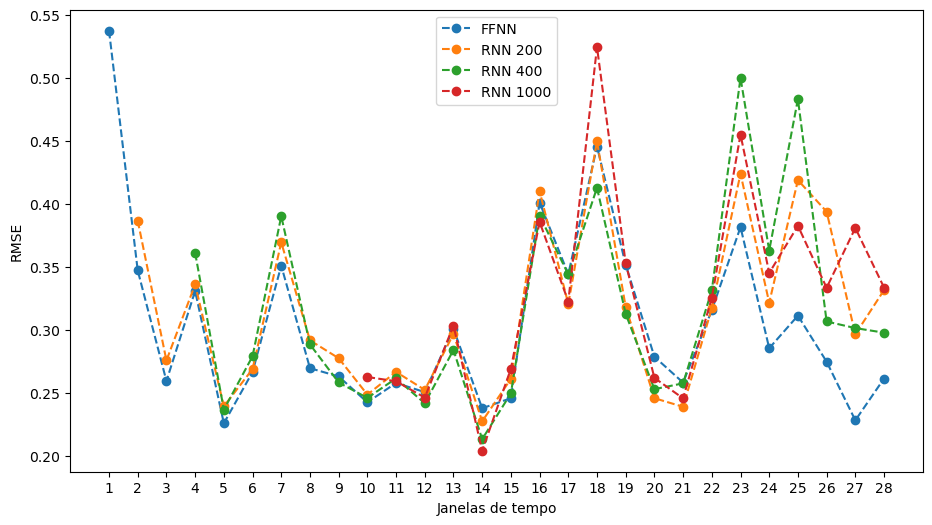

LSTMxFFNN RMSE por janelas


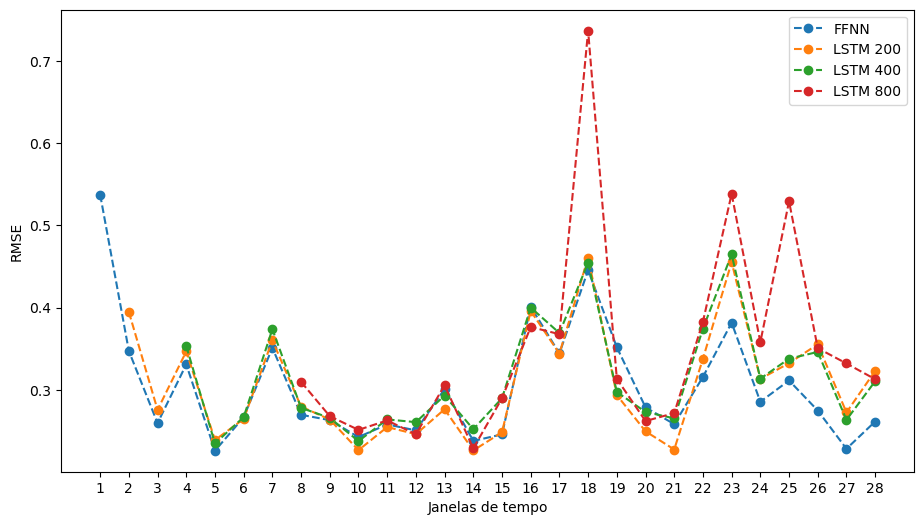

Acuracia por janelas RNNxFFNN


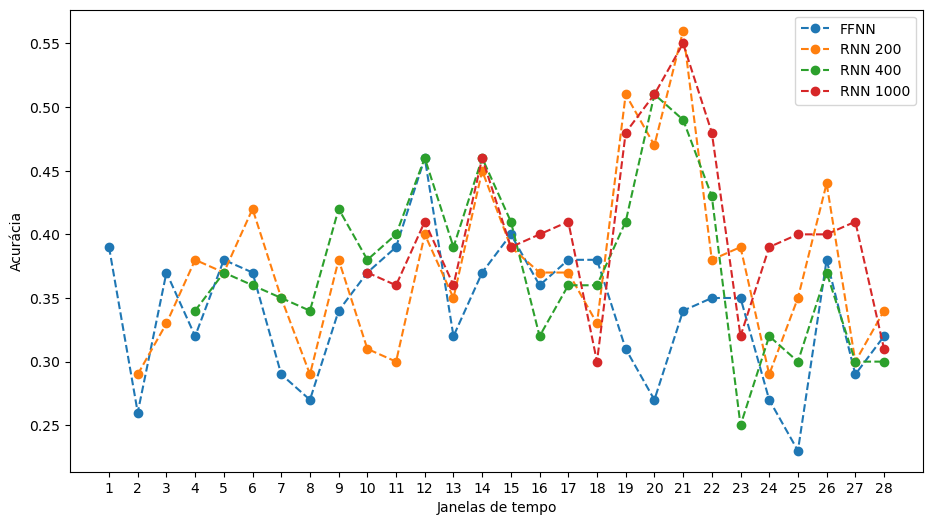

Acuracia por janelas LSTMxFFNN


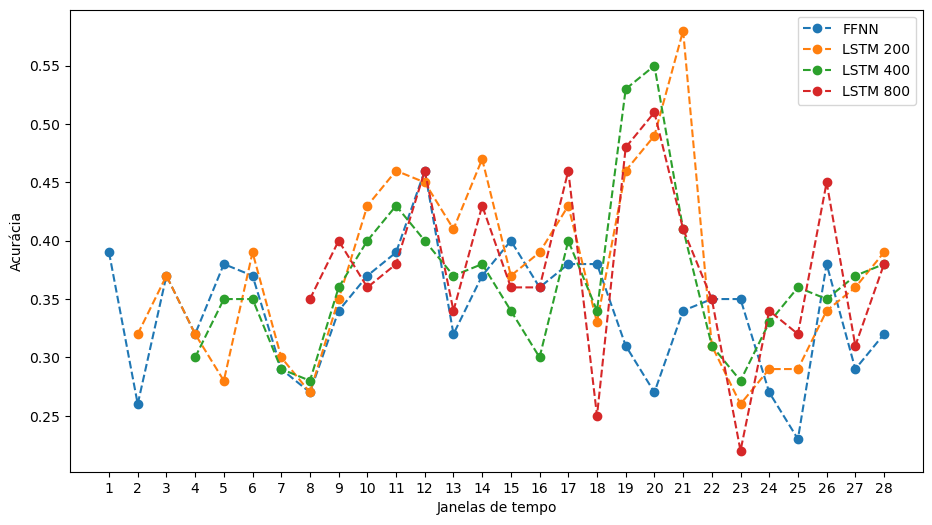

In [19]:
#plotando variacao do erro nas janelas
print("RNNxFFNN RMSE por janelas")
x = list(range(1,(len(mlp_window_rmse))))
plt.figure(figsize=(11, 6))
plt.plot(x , mlp_window_rmse[1:], label = "FFNN",linestyle='--', marker='o')
# plt.plot(x , rnn_window_rmse['50'][1:], label = "RNN 50",linestyle='--', marker='o')
# plt.plot(x , rnn_window_rmse['100'][1:], label = "RNN 100",linestyle='--', marker='o')
plt.plot(x , rnn_window_rmse['200'][1:], label = "RNN 200",linestyle='--', marker='o')
plt.plot(x , rnn_window_rmse['400'][1:], label = "RNN 400",linestyle='--', marker='o')
# plt.plot(x , rnn_window_rmse['800'][1:], label = "RNN 800",linestyle='--', marker='o')
plt.plot(x , rnn_window_rmse['1000'][1:], label = "RNN 1000",linestyle='--', marker='o')
plt.xticks([i for i in x])
plt.legend()
plt.xlabel('Janelas de tempo')
plt.ylabel('RMSE')
plt.savefig("./Images/nextvalue_prediction_rnnxmlp_windows_rmse_comparison.png")
plt.show()

print("LSTMxFFNN RMSE por janelas")
x = list(range(1,(len(mlp_window_rmse))))
plt.figure(figsize=(11, 6))
plt.plot(x , mlp_window_rmse[1:], label = "FFNN",linestyle='--', marker='o')
# plt.plot(x , lstm_window_rmse['50'][1:], label = "LSTM 50",linestyle='--', marker='o')
# plt.plot(x , lstm_window_rmse['100'][1:], label = "LSTM 100",linestyle='--', marker='o')
plt.plot(x , lstm_window_rmse['200'][1:], label = "LSTM 200",linestyle='--', marker='o')
plt.plot(x , lstm_window_rmse['400'][1:], label = "LSTM 400",linestyle='--', marker='o')
plt.plot(x , lstm_window_rmse['800'][1:], label = "LSTM 800",linestyle='--', marker='o')
# plt.plot(x , lstm_window_rmse['1000'][1:], label = "LSTM 1000",linestyle='--', marker='o')
plt.xticks([i for i in x])
plt.xlabel('Janelas de tempo')
plt.ylabel('RMSE')
plt.legend()
plt.savefig("./Images/nextvalue_prediction_lstmxmlp_windows_rmse_comparison.png")
plt.show()

#plotando variacao da acuracia nas janelas
print("Acuracia por janelas RNNxFFNN")
x = list(range(1,(len(mlp_window_acc))))
plt.figure(figsize=(11, 6))
plt.plot(x , mlp_window_acc[1:], label = "FFNN",linestyle='--', marker='o')
# plt.plot(x , rnn_window_acc['50'][1:], label = "RNN 50",linestyle='--', marker='o')
# plt.plot(x , rnn_window_acc['100'][1:], label = "RNN 100",linestyle='--', marker='o')
plt.plot(x , rnn_window_acc['200'][1:], label = "RNN 200",linestyle='--', marker='o')
plt.plot(x , rnn_window_acc['400'][1:], label = "RNN 400",linestyle='--', marker='o')
# plt.plot(x , rnn_window_acc['800'][1:], label = "RNN 800",linestyle='--', marker='o')
plt.plot(x , rnn_window_acc['1000'][1:], label = "RNN 1000",linestyle='--', marker='o')
plt.xticks([i for i in x])
plt.xlabel('Janelas de tempo')
plt.ylabel('Acurácia')
plt.legend()
plt.savefig("./Images/nextvalue_prediction_rnnxmlp_windows_acc_comparison.png")
plt.show()

print("Acuracia por janelas LSTMxFFNN")
x = list(range(1,(len(mlp_window_acc))))
plt.figure(figsize=(11, 6))
plt.plot(x , mlp_window_acc[1:], label = "FFNN",linestyle='--', marker='o')
# plt.plot(x , lstm_window_acc['50'][1:], label = "LSTM 50",linestyle='--', marker='o')
# plt.plot(x , lstm_window_acc['100'][1:], label = "LSTM 100",linestyle='--', marker='o')
plt.plot(x , lstm_window_acc['200'][1:], label = "LSTM 200",linestyle='--', marker='o')
plt.plot(x , lstm_window_acc['400'][1:], label = "LSTM 400",linestyle='--', marker='o')
plt.plot(x , lstm_window_acc['800'][1:], label = "LSTM 800",linestyle='--', marker='o')
# plt.plot(x , lstm_window_acc['1000'][1:], label = "LSTM 1000",linestyle='--', marker='o')
plt.xticks([i for i in x])
plt.xlabel('Janelas de tempo')
plt.ylabel('Acurácia')
plt.legend()
plt.savefig("./Images/nextvalue_prediction_lstmxmlp_windows_acc_comparison.png")
plt.show()

In [20]:
def avg_not_none(entrada):
    temp_calc = []
    for i in entrada:
        if i != None:
            temp_calc.append(i)
    
    if len(temp_calc) > 0:
        return sum(temp_calc)/len(temp_calc)
    else:
        return None

In [21]:
print(avg_not_none(mlp_window_acc))
print(avg_not_none(rnn_window_acc['50']))
print(avg_not_none(rnn_window_acc['100']))
print(avg_not_none(rnn_window_acc['200']))
print(avg_not_none(rnn_window_acc['400']))
print(avg_not_none(rnn_window_acc['800']))
print(avg_not_none(rnn_window_acc['1000']))
print(avg_not_none(lstm_window_acc['50']))
print(avg_not_none(lstm_window_acc['100']))
print(avg_not_none(lstm_window_acc['200']))
print(avg_not_none(lstm_window_acc['400']))
print(avg_not_none(lstm_window_acc['800']))
print(avg_not_none(lstm_window_acc['1000']))

0.3403571428571429
0.35821428571428576
0.3464285714285715
0.37444444444444436
0.3760000000000001
0.3333333333333333
0.4057894736842106
0.38107142857142856
0.37249999999999994
0.37444444444444436
0.3664
0.37714285714285706
0.34947368421052627


In [22]:
print(avg_not_none(mlp_window_rmse))
print(avg_not_none(rnn_window_rmse['50']))
print(avg_not_none(rnn_window_rmse['100']))
print(avg_not_none(rnn_window_rmse['200']))
print(avg_not_none(rnn_window_rmse['400']))
print(avg_not_none(rnn_window_rmse['800']))
print(avg_not_none(rnn_window_rmse['1000']))
print(avg_not_none(lstm_window_rmse['50']))
print(avg_not_none(lstm_window_rmse['100']))
print(avg_not_none(lstm_window_rmse['200']))
print(avg_not_none(lstm_window_rmse['400']))
print(avg_not_none(lstm_window_rmse['800']))
print(avg_not_none(lstm_window_rmse['1000']))

0.32546965543933193
0.329257943813534
0.34201351111235406
0.3143200531407078
0.31462249782248275
0.3702807260877108
0.32605285156195235
0.32120341700155064
0.32196237068882444
0.30606721287173755
0.3135997298600197
0.347303031932024
0.3453027731324947
